In [1]:
from rossby_waves import *
from math import floor
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion, grid, trajectory, vel
from matplotlib.animation import FuncAnimation, PillowWriter

In [ ]:
with open("0.001.bin", 'rb') as f:
    data = np.array(pickle.load(f))
with open("1.bin", 'rb') as f:
    data2 = np.array(pickle.load(f))
with open("0.bin", 'rb') as f:
    data3 = np.array(pickle.load(f))
with open("0.01.bin", 'rb') as f:
    data4 = np.array(pickle.load(f))


In [ ]:
def dxt2(data):
    x = data[0,:,:]
    a = []

    for j in range(201):
        b = 0
        for i in range(10000):
            b += (x[i,j] - x[i,0]) ** 2
        a.append(b/10000)
    return a

def dyt2(data):
    y = data[1,:,:]
    a = []

    for j in range(201):
        b = 0
        for i in range(10000):
            b += (y[i,j-1] - y[i,0]) ** 2
        a.append(b/10000)
    return a

In [ ]:
c = dxt2(data)
print(c)

In [ ]:
t = np.linspace(0, 5e11,201)

fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,dyt2(data3))
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('spd1x.png')

Motion of the center of mass, otherwise known as the first moment of the particle displacements can be written as: $ M_x(t) = \frac{1}{N} \sum_{i=1}^N (x_i(t) - x_i(0))$ for the $x$ direction. We want  $D_x(t) = \frac{1}{N(N-1)} \sum_{i=1}^N (x_i(t) - x_i(0))^2$ and we will consider $x$ and $y$ directions separately.

In [2]:
def dxt(ro, x, t, e):
    p1, p2 = trajectory(ro, x, 0, t, 2.5e9, eps=e)
    p3, p4 = np.array(p1), np.array(p2)
    a = 0
    for i in range(len(p1)):
        a += (p3[i,-1] - p3[i,00]) ** 2
    return a/len(p1)

def dyt(ro, x, t, e):
    p1, p2 = trajectory(ro, x, 0, t, 2.5e9, eps=e)
    p3, p4 = np.array(p1), np.array(p2)
    a = 0
    for i in range(len(p1)):
        a += (p4[i,-1] - p4[i,0]) ** 2
    return a/len(p2)

In [3]:
r = RossbyWave(np.array([5, 5]))
ro = RossbyOcean([r])
ro.add_grid_waves()
ro.remove_wave(0)
x = grid(100)
t = np.linspace(0, 5e11,201)

In [ ]:
dyt(ro,x,0.05,0)

Purely irrotational flow (eps = 0)

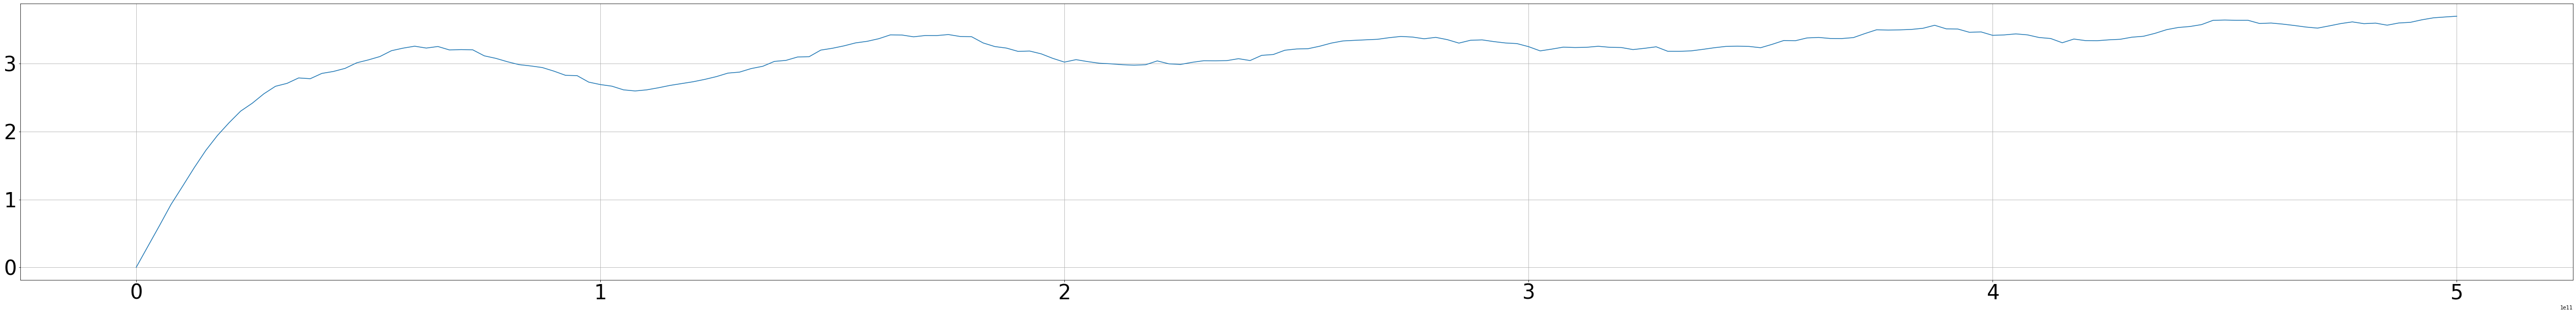

In [4]:
arr = []
for i in t:
    arr.append(dyt(ro, x, i, 0))
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('spd0y.png')

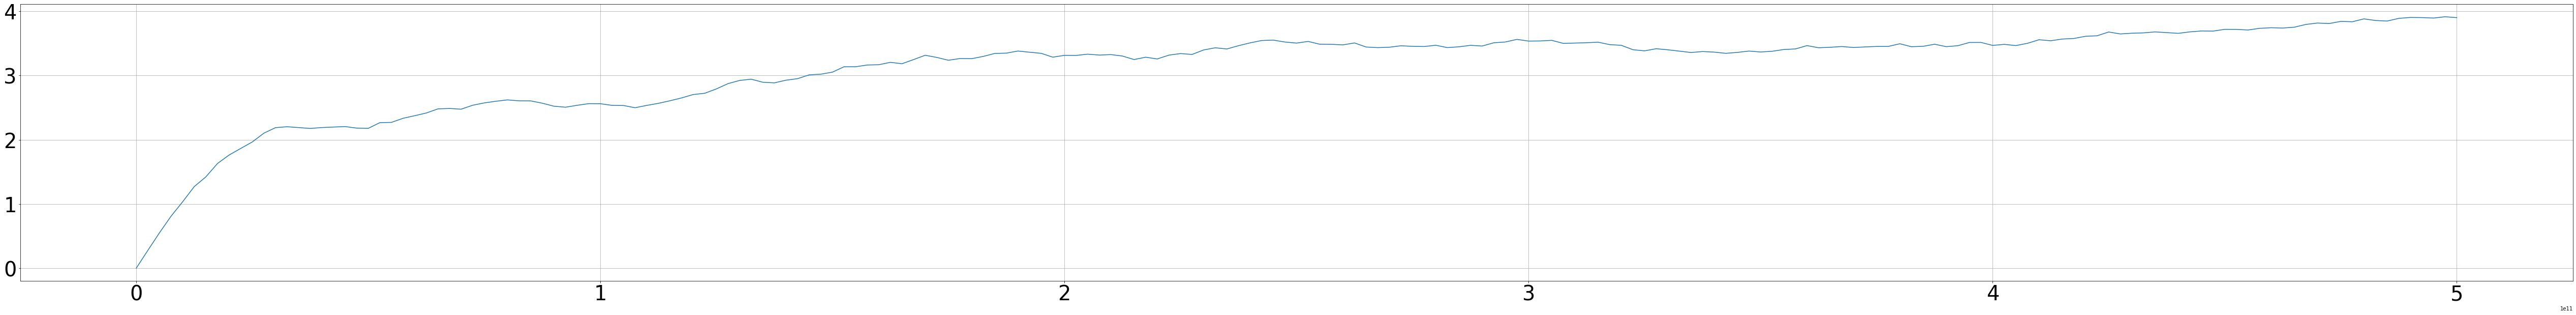

In [5]:
arr = []
for i in t:
    arr.append(dxt(ro, x, i, 0))
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('spd0x.png')

Purely Rotational flow (eps = 1)

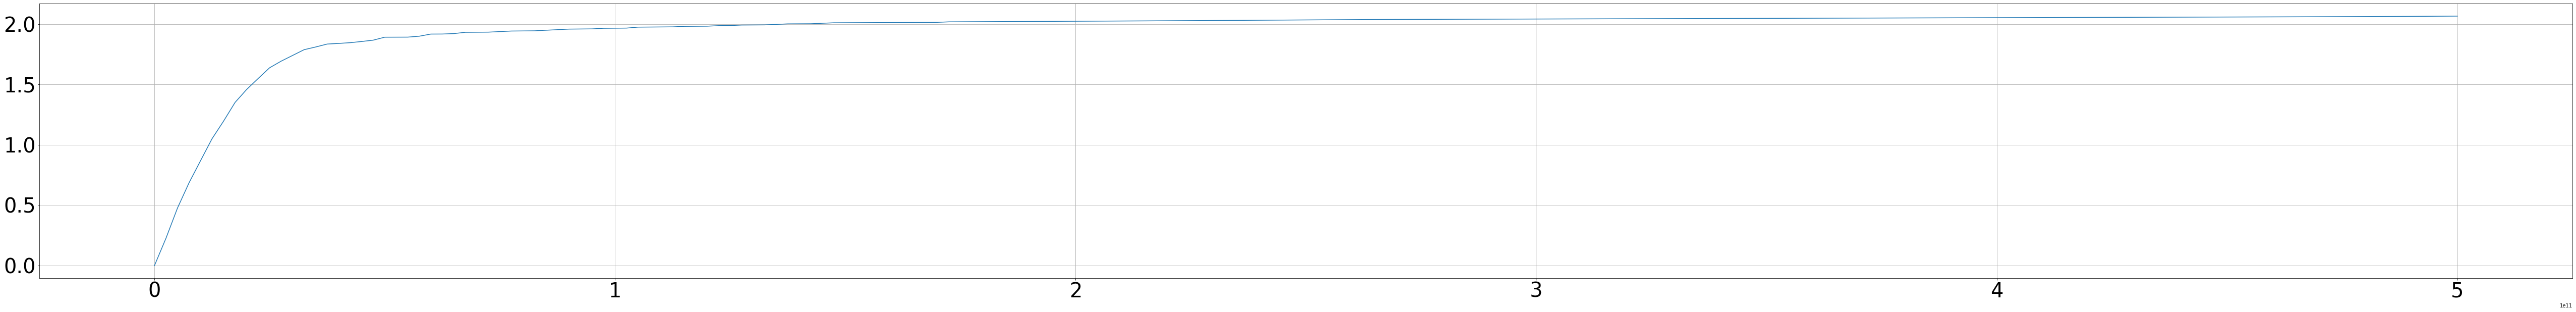

In [6]:
arr = []
for i in t:
    arr.append(dyt(ro, x, i, 1))
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('spd1y.png')


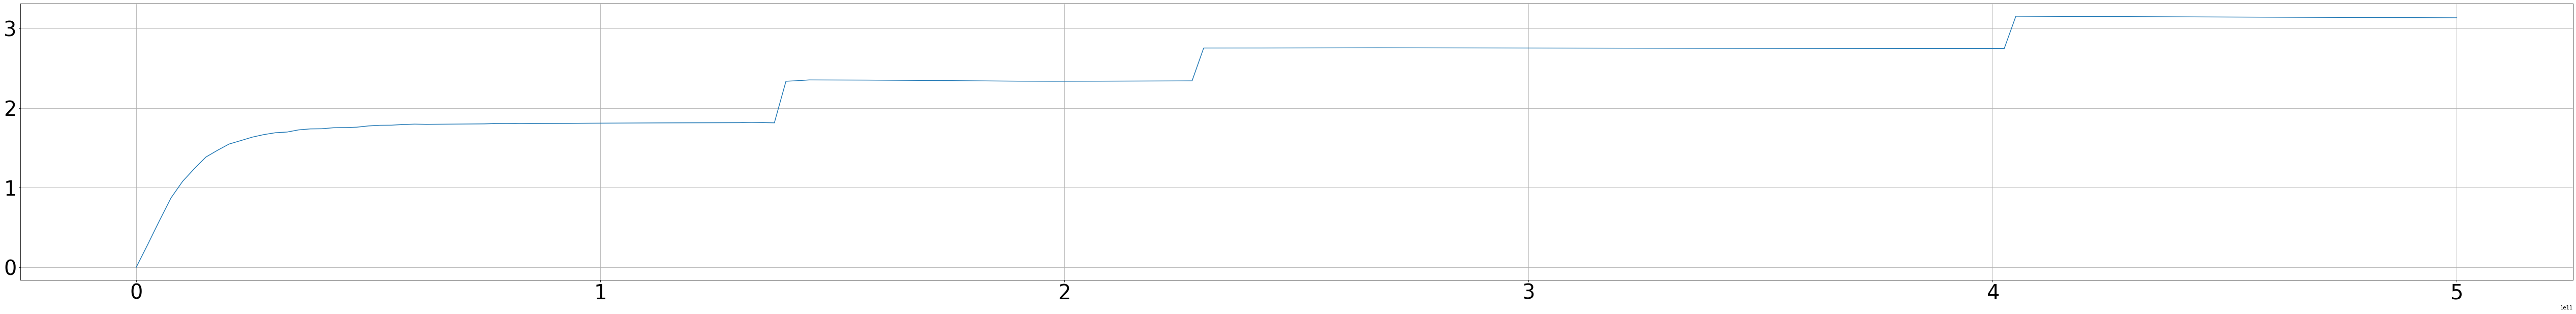

In [7]:
arr = []
for i in t:
    arr.append(dxt(ro, x, i, 1))
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('spd1x.png')

Weak rotational flow (eps = 0.01)


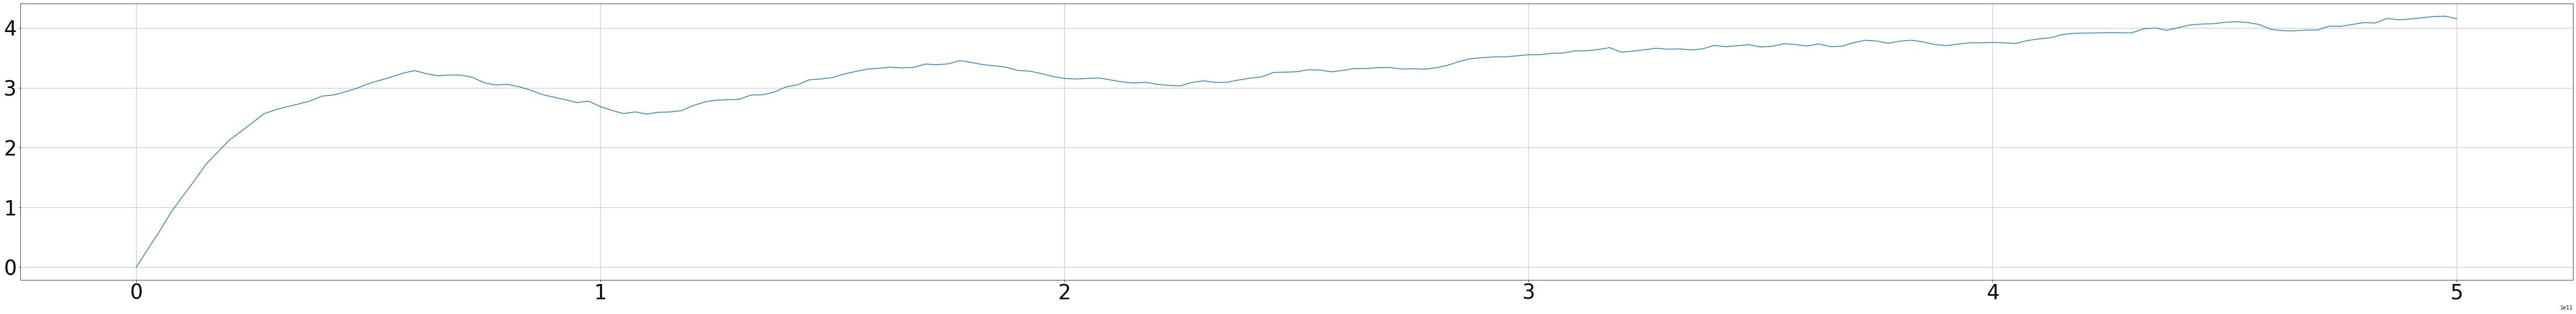

In [8]:
arr = []
for i in t:
    arr.append(dyt(ro, x, i, 0.01))
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('spd0.1y.png')

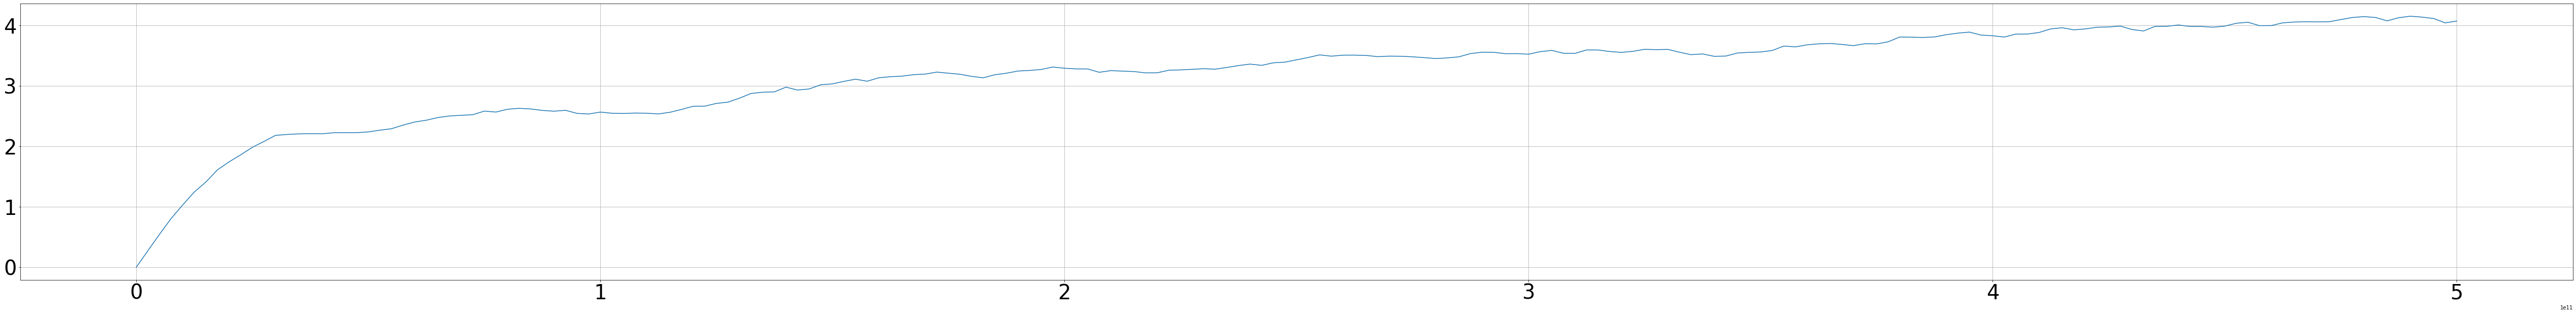

In [9]:
arr = []
for i in t:
    arr.append(dxt(ro, x, i, 0.01))
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('spd0.1x.png')

Extremely Weak Rotational flow (eps =0.001)

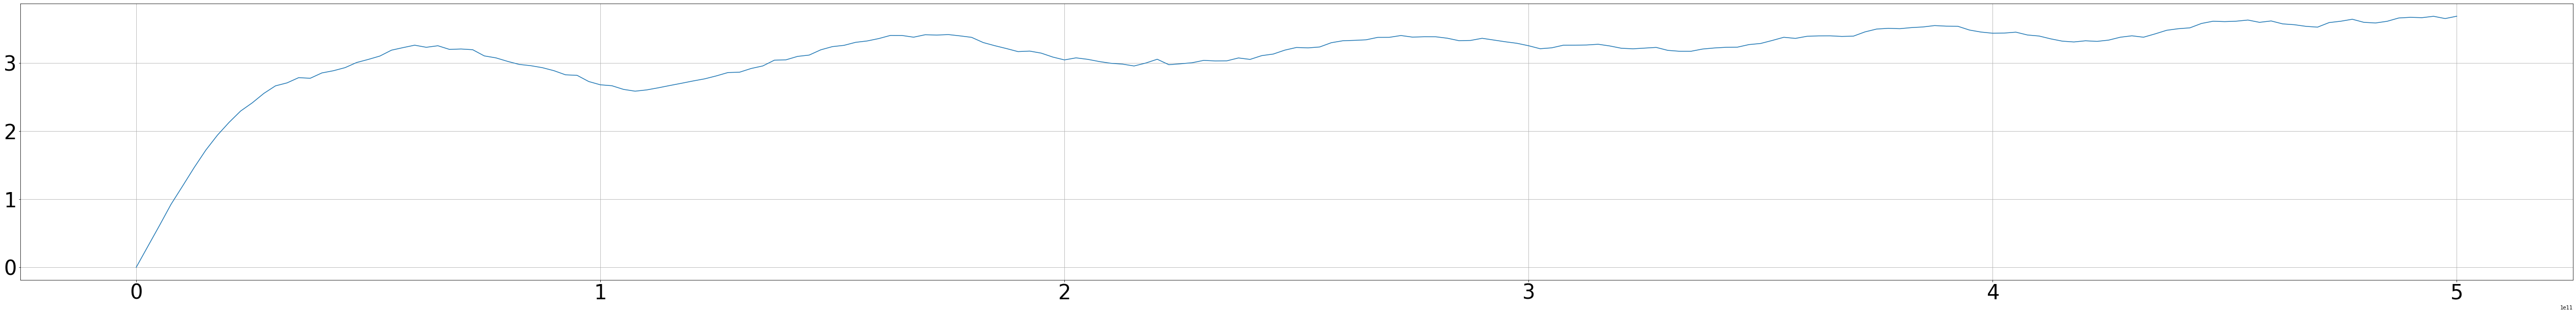

In [10]:
arr = []
for i in t:
    arr.append(dyt(ro, x, i, 0.0001))
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('spd0.001y.png')

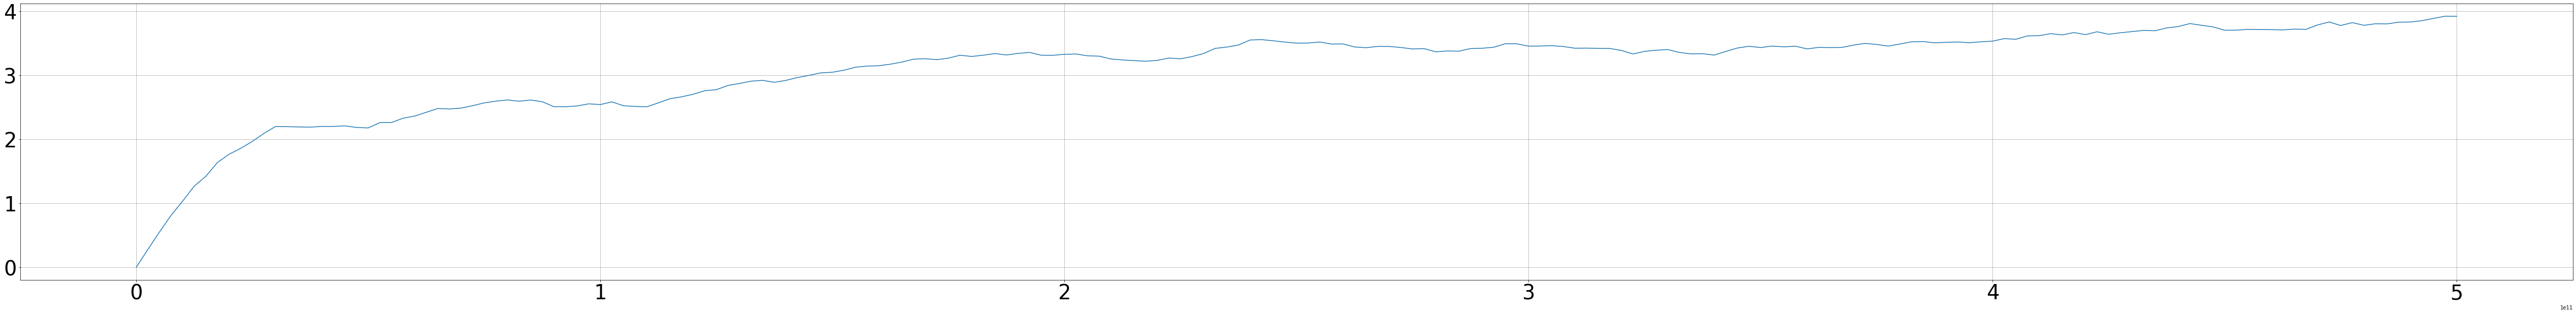

In [11]:
arr = []
for i in t:
    arr.append(dxt(ro, x, i, 0.001))
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('spd0.001x.png')